In [ ]:
#testing out the nba_api
from nba_api.stats.endpoints import playercareerstats
# Anthony Davis
career = playercareerstats.PlayerCareerStats(player_id='203076')
career.get_data_frames()[0].columns

In [29]:
# Dependencies
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

adv_path = "Research Data/NBAadvanced.csv"
per_path = "Research Data/NBAper36.csv"
sal_path = "Research Data/NBAsalaries.csv"
birth_path = "Research Data/birth_dataframe.csv"

adv_data = pd.read_csv(adv_path, encoding='utf8')
per_data = pd.read_csv(per_path, encoding='utf8')
sal_data = pd.read_csv(sal_path, encoding='utf8')
birth_data = pd.read_csv(birth_path, encoding='utf8')
birth_data = birth_data[["Player","City", "State"]]


#filling all of the null values with 
adv_data.fillna(0, inplace = True)
per_data.fillna(0, inplace = True) 
sal_data.fillna(0, inplace = True) 

In [30]:
# adv_sal = pd.merge(adv_data,sal_data, on = "Player")
# per_sal = pd.merge(per_data,sal_data, on = "Player")
adv_birth = pd.merge(adv_data,birth_data, on = "Player")
per_birth = pd.merge(per_data,birth_data, on = "Player")
per_birth_sal = pd.merge(per_birth,sal_data, on = "Player")
adv_birth_sal = pd.merge(adv_birth,sal_data, on = "Player")

In [96]:
#per_birth_sal.count()
per_birth_sal.to_csv("per_birth_sal.csv", index= False)

In [32]:
adv_birth_sal.to_csv("adv_birth_sal.csv", index=False)

In [33]:
adv_birth_sal.columns

Index(['Player', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'City', 'State',
       '2019-20'],
      dtype='object')

In [34]:
per_birth_sal.columns

Index(['Player', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'City', 'State', '2019-20'],
      dtype='object')

In [73]:
per_birth_sal['millions'] = per_birth_sal['2019-20']/1000000
state_sal = per_birth_sal.groupby('State')['millions'].median().reset_index()
play_sal = per_birth_sal.groupby('State')['Player'].count().reset_index()

In [74]:
combined_df = pd.merge(state_sal,play_sal, on = "State")
combined_df.head()

,State,millions,Player
0,Alabama,4.767000,5
1,Arizona,3.481140,4
2,Arkansas,4.028400,5
3,California,6.137031,40
4,Colorado,1.948080,1


In [77]:
combined_df = combined_df.sort_values('millions',ascending = False)

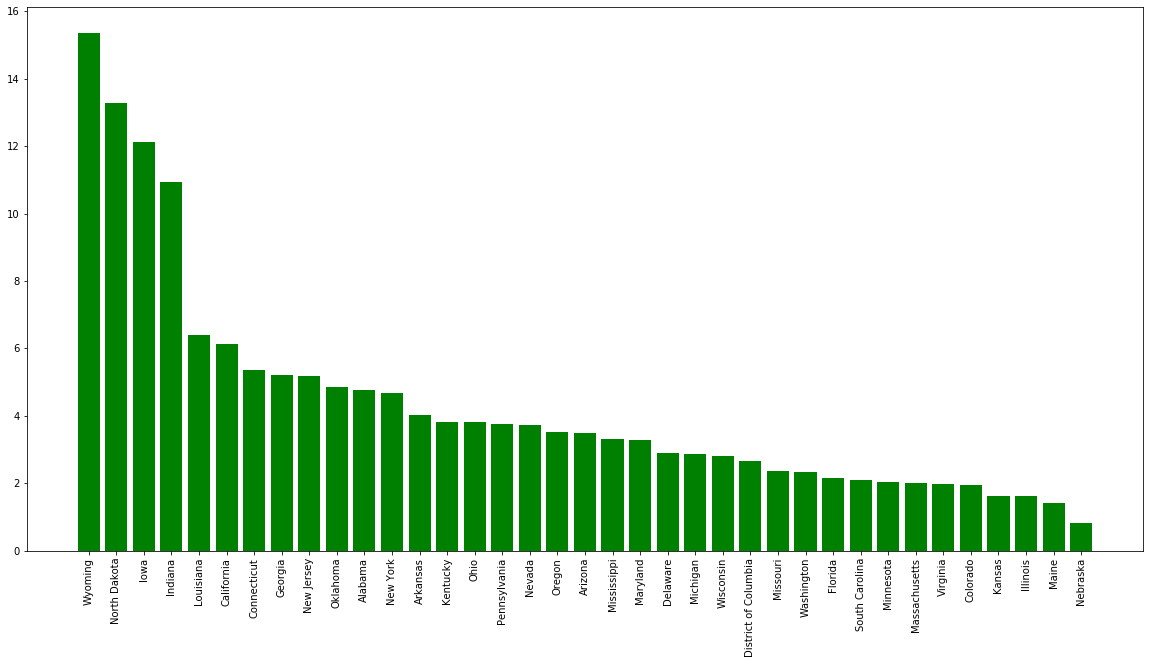

In [94]:
x_values = combined_df['State']
y_values = combined_df['millions']

plt.figure(figsize = (20,10))
plt.bar(x_values, y_values,color = 'g',align = 'center')
plt.xticks(rotation='vertical')
#plt.tight_layout()
plt.show()